## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, how ='outer', on="Mouse ID")
# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(study_df["Mouse ID"].unique())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df.loc[study_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = study_df.loc[study_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = study_df.loc[study_df['Mouse ID'] != "g989"]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(cleaned_df["Mouse ID"].unique())
new_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_mean = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_std = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_sem = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                             "Median Tumor Volume": regimen_median, 
                             "Tumor Volume Variance": regimen_variance,
                             "Tumor Volume Std. Dev.": regimen_std,
                             "Tumor Volume Std. Err.": regimen_sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_df.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

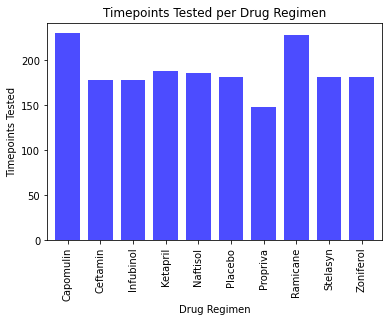

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_sum = cleaned_df.groupby("Drug Regimen").count()["Timepoint"]

bar_chart = timepoint_sum.plot(kind = 'bar', color = 'blue', alpha = 0.7, 
                               title = 'Timepoints Tested per Drug Regimen', width= 0.75, align= 'center')

bar_chart.set(xlabel="Drug Regimen", ylabel="Timepoints Tested");

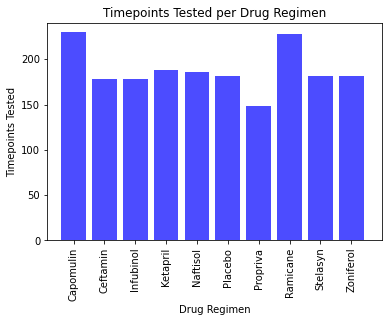

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = cleaned_df["Drug Regimen"].sort_values().unique()

plt.bar(drug_regimen, timepoint_sum, color = 'blue', alpha = 0.7, align = 'center')
plt.xlim(-0.85, len(drug_regimen))
plt.ylim(0, max(timepoint_sum)+10)

tick_location = [value for value in drug_regimen]
plt.xticks(tick_location, rotation = 'vertical')

plt.title("Timepoints Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Tested");

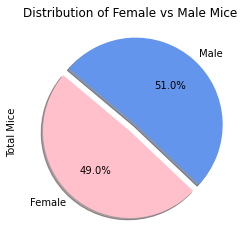

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["pink", "cornflowerblue"]
population = cleaned_df.groupby(["Sex"]).count()["Mouse ID"]
explode = (0,0.1)

piechart = population.plot(kind= "pie", autopct = "%1.1f%%", title="Distribution of Female vs Male Mice",
          shadow= True, colors = colors, explode = explode, startangle = 140)
piechart.set(ylabel="Total Mice")
plt.show()

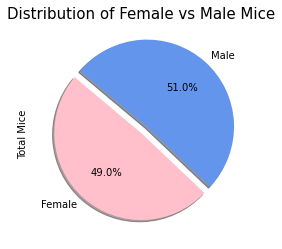

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = cleaned_df["Sex"].sort_values().unique()
explode = (0,0.1)

plt.pie(population, labels = label, autopct = "%1.1f%%", explode= explode, shadow = True, 
       startangle = 140, colors = colors)
plt.title("Distribution of Female vs Male Mice", fontsize = 15)
plt.ylabel("Total Mice");

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_45 = cleaned_df.groupby("Mouse ID").max()["Timepoint"]
timepoint_45 = timepoint_45.reset_index()

In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tp_df = pd.merge(cleaned_df, timepoint_45, on=["Mouse ID","Timepoint"], how='inner')
greatest_tp_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [15]:
capomulin = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_vol = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"]==name,"Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_regimen = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{name} 's a potential outlier {outlier_regimen}")

Capomulin 's a potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane 's a potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 's a potential outlier 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin 's a potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)


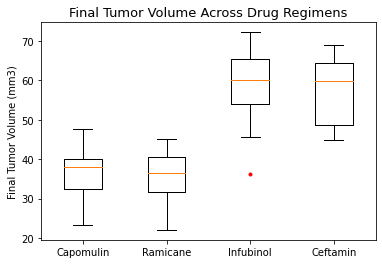

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data, labels = names, sym='r.')
plt.title("Final Tumor Volume Across Drug Regimens", size=13)
plt.ylabel("Final Tumor Volume (mm3)");

## Line and Scatter Plots

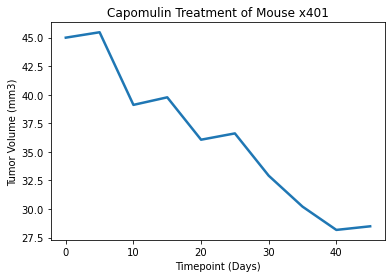

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = cleaned_df.loc[cleaned_df["Mouse ID"] == "x401"]

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], linewidth = 2.5)
plt.title("Capomulin Treatment of Mouse x401")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)");

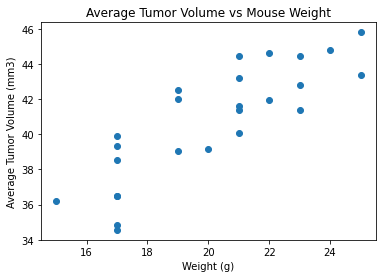

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"][['Tumor Volume (mm3)',"Weight (g)", "Mouse ID"]]

avg_capomulin = capomulin_df.groupby("Mouse ID").mean()

plt.scatter(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");

## Correlation and Regression

The r-squared is: 0.7088568047708721


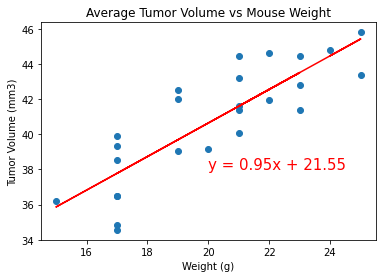

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
merged = pd.merge(mouse_metadata, average_tumor_vol, on = "Mouse ID")

x_values = merged['Weight (g)']
y_values = merged['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()